In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read data and convert categorical columns

In [2]:
# df = pd.read_csv('/kaggle/input/body-levels-train-data/body_level_classification_train.csv')
df = pd.read_csv('body_level_classification_train.csv')
df.head()

Gender        Age    Height     Weight H_Cal_Consump  Veg_Consump  \
0  Female  22.547298  1.722461  51.881263           yes     2.663421   
1    Male  19.799054  1.743702  54.927529           yes     2.000000   
2  Female  17.823438  1.708406  50.000000           yes     1.642241   
3  Female  19.007177  1.690727  49.895716           yes     1.212908   
4    Male  19.729250  1.793315  58.195150           yes     2.508835   

   Water_Consump Alcohol_Consump Smoking  Meal_Count Food_Between_Meals  \
0       1.041110              no      no    3.000000         Frequently   
1       2.847264       Sometimes      no    3.289260          Sometimes   
2       1.099231       Sometimes      no    3.452590          Sometimes   
3       1.029703       Sometimes      no    3.207071          Sometimes   
4       2.076933              no      no    3.435905          Sometimes   

  Fam_Hist H_Cal_Burn  Phys_Act  Time_E_Dev              Transport  \
0      yes         no  0.794402    1.391948  Public_Transportation   
1      yes         no  1.680844    2.000000  Public_Transportation   
2       no         no  0.418875    1.000000  Public_Transportation   
3       no         no  2.000000    1.000000  Public_Transportation   
4      yes         no  2.026668    1.443328             Automobile   

     Body_Level  
0  Body Level 1  
1  Body Level 1  
2  Body Level 1  
3  Body Level 1  
4  Body Level 1

In [3]:
df.describe()

Age       Height       Weight  Veg_Consump  Water_Consump  \
count  1477.000000  1477.000000  1477.000000  1477.000000    1477.000000   
mean     24.290420     1.701602    86.542290     2.421912       2.005120   
std       6.323081     0.094654    26.278277     0.540711       0.620307   
min      15.000000     1.456346    39.000000     1.000000       1.000000   
25%      19.895877     1.629194    65.000000     2.000000       1.549931   
50%      22.720449     1.701284    82.636162     2.416044       2.000000   
75%      26.000000     1.770278   106.690530     3.000000       2.482933   
max      55.246250     1.980000   173.000000     3.000000       3.000000   

        Meal_Count     Phys_Act   Time_E_Dev  
count  1477.000000  1477.000000  1477.000000  
mean      2.682104     1.023106     0.650672  
std       0.790751     0.844840     0.605199  
min       1.000000     0.000000     0.000000  
25%       2.644692     0.145687     0.000000  
50%       3.000000     1.000000     0.616045  
75%       3.000000     1.672639     1.000000  
max       4.000000     3.000000     2.000000

In [4]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [7]:
df_coded_values = df.copy()
for col in df.columns:
    if df_coded_values[col].dtype == 'object':
        df_coded_values[col] = df_coded_values[col].astype('category').cat.codes

In [8]:
df_coded_values.head()

Gender        Age    Height     Weight  H_Cal_Consump  Veg_Consump  \
0       0  22.547298  1.722461  51.881263              1     2.663421   
1       1  19.799054  1.743702  54.927529              1     2.000000   
2       0  17.823438  1.708406  50.000000              1     1.642241   
3       0  19.007177  1.690727  49.895716              1     1.212908   
4       1  19.729250  1.793315  58.195150              1     2.508835   

   Water_Consump  Alcohol_Consump  Smoking  Meal_Count  Food_Between_Meals  \
0       1.041110                3        0    3.000000                   1   
1       2.847264                2        0    3.289260                   2   
2       1.099231                2        0    3.452590                   2   
3       1.029703                2        0    3.207071                   2   
4       2.076933                3        0    3.435905                   2   

   Fam_Hist  H_Cal_Burn  Phys_Act  Time_E_Dev  Transport  Body_Level  
0         1           0  0.794402    1.391948          3           0  
1         1           0  1.680844    2.000000          3           0  
2         0           0  0.418875    1.000000          3           0  
3         0           0  2.000000    1.000000          3           0  
4         1           0  2.026668    1.443328          0           0

# Analysis the data

- ## visualization

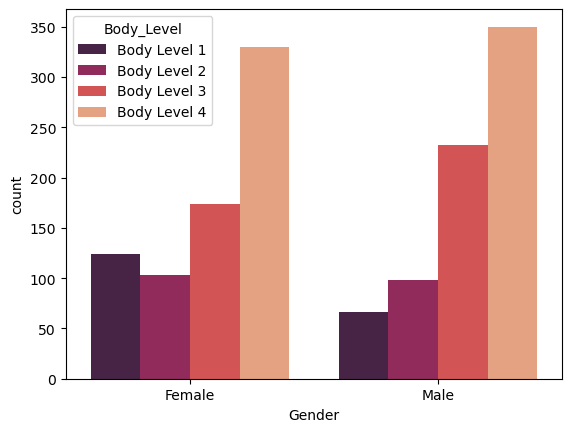

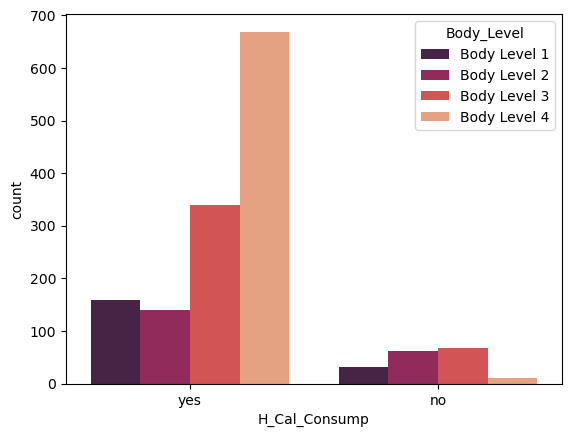

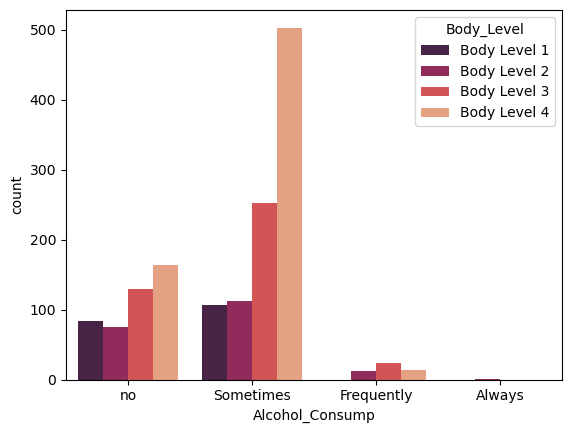

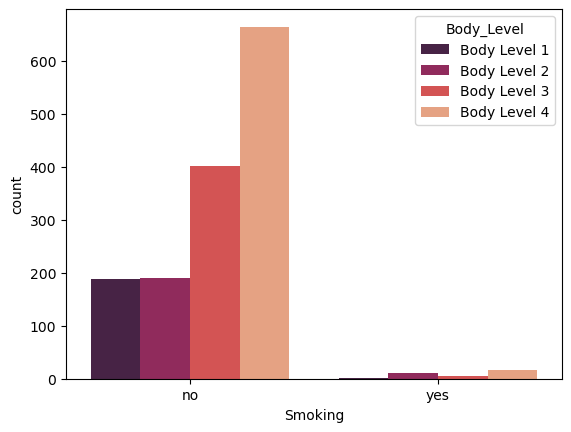

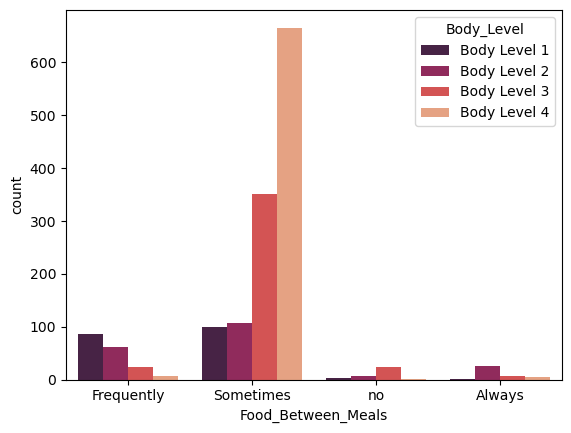

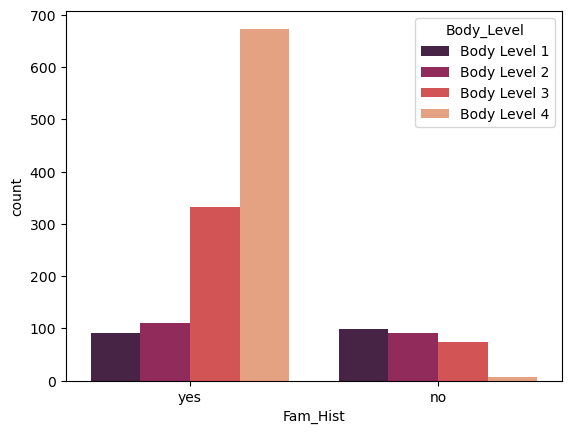

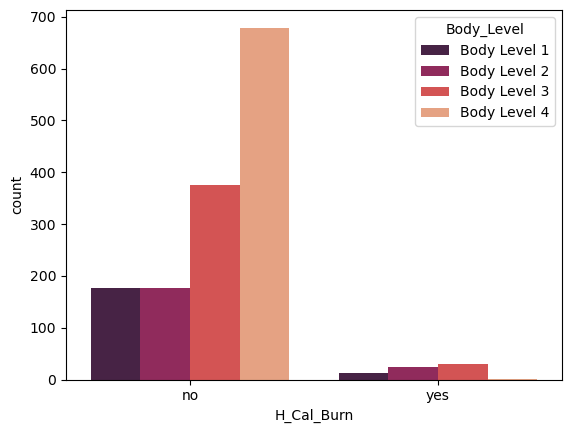

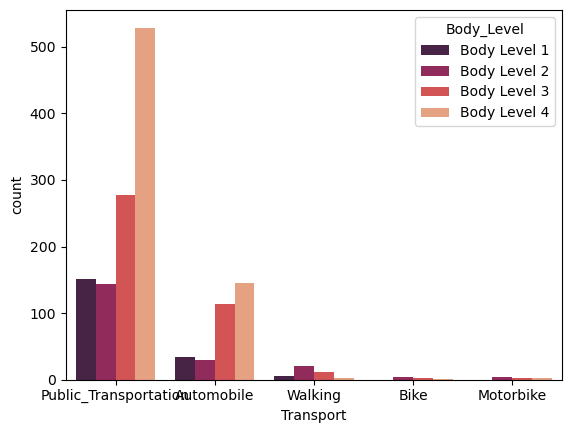

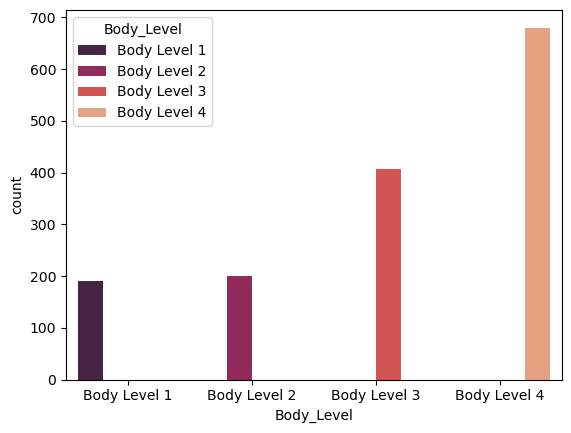

In [27]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(x = col, data = df, hue = 'Body_Level', palette='rocket')
        plt.show()

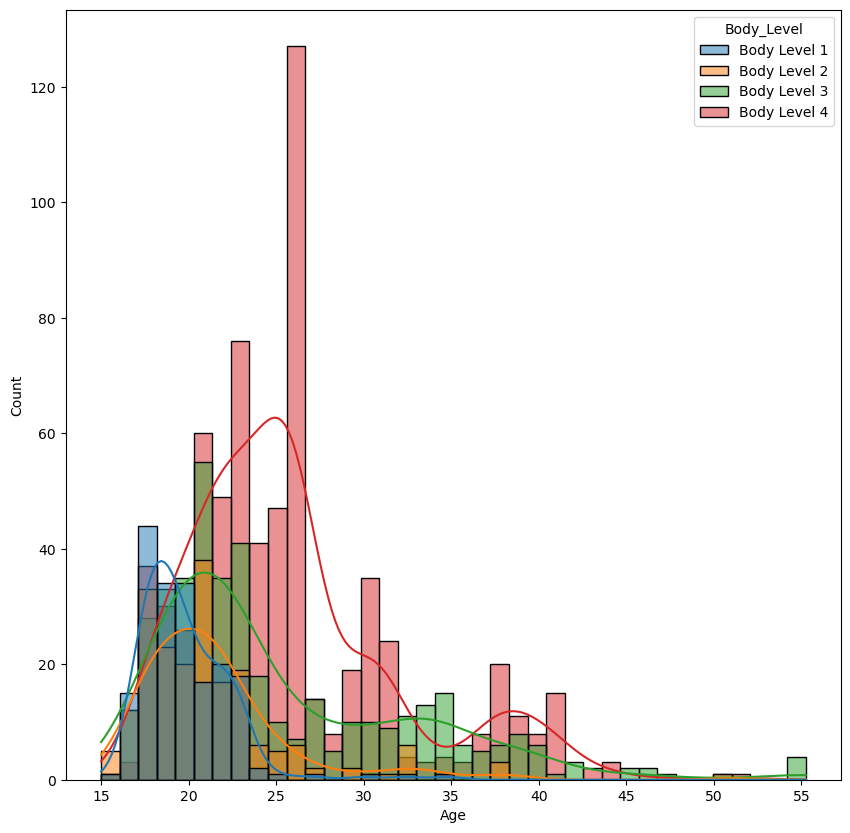

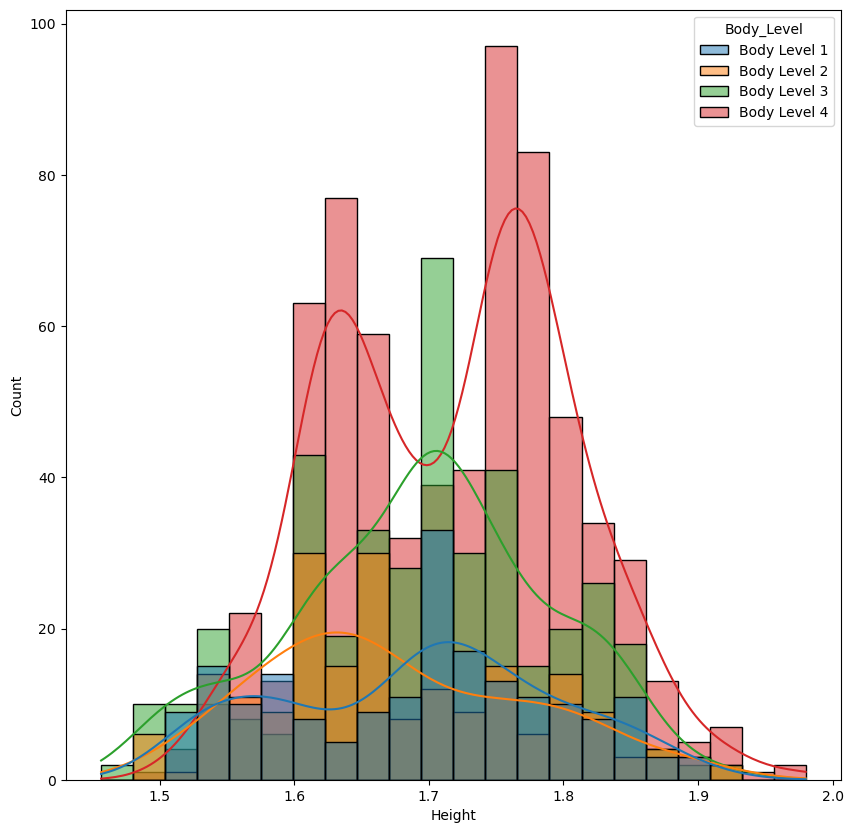

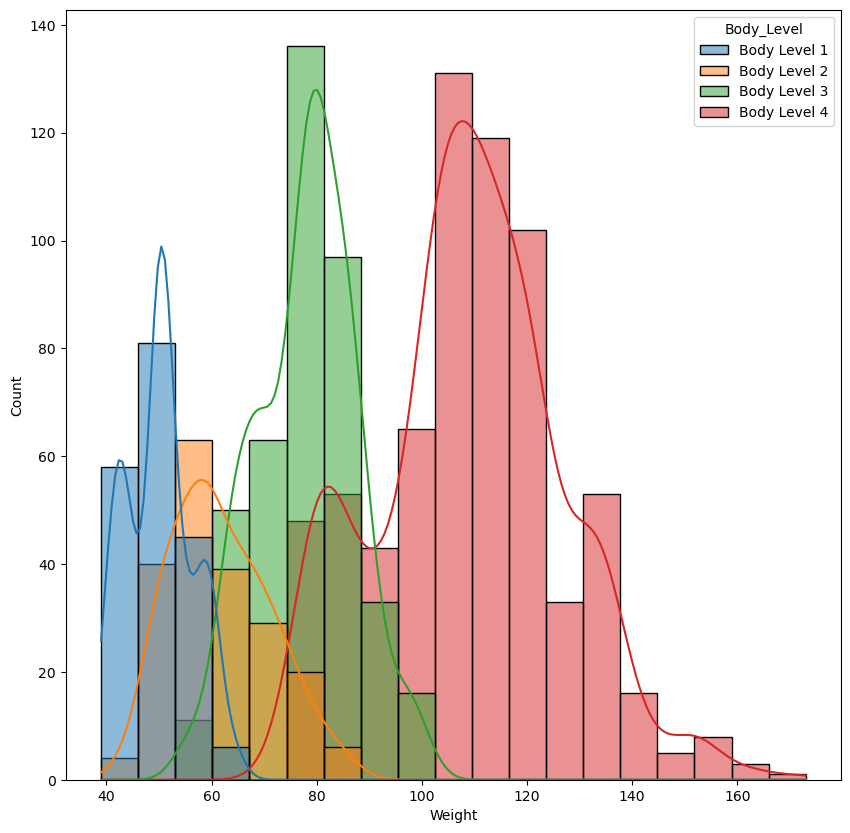

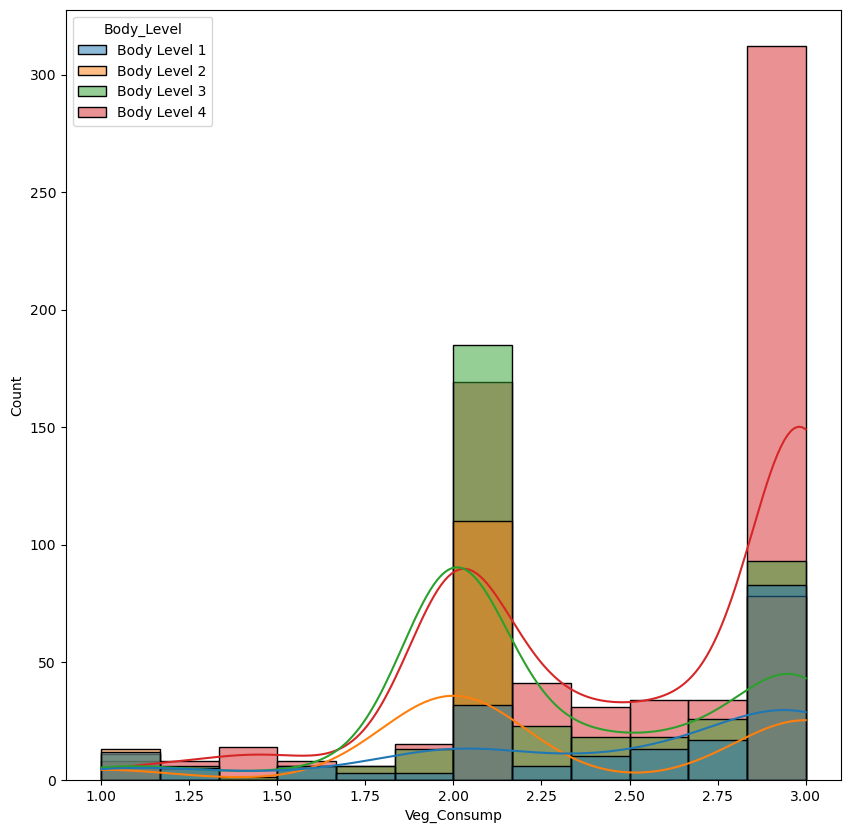

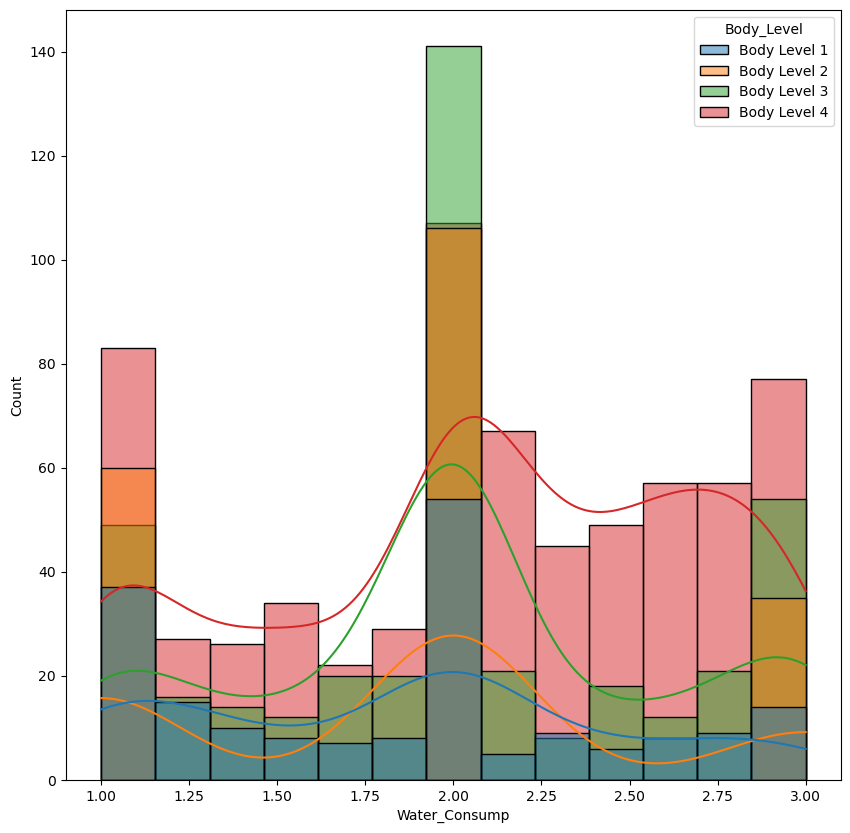

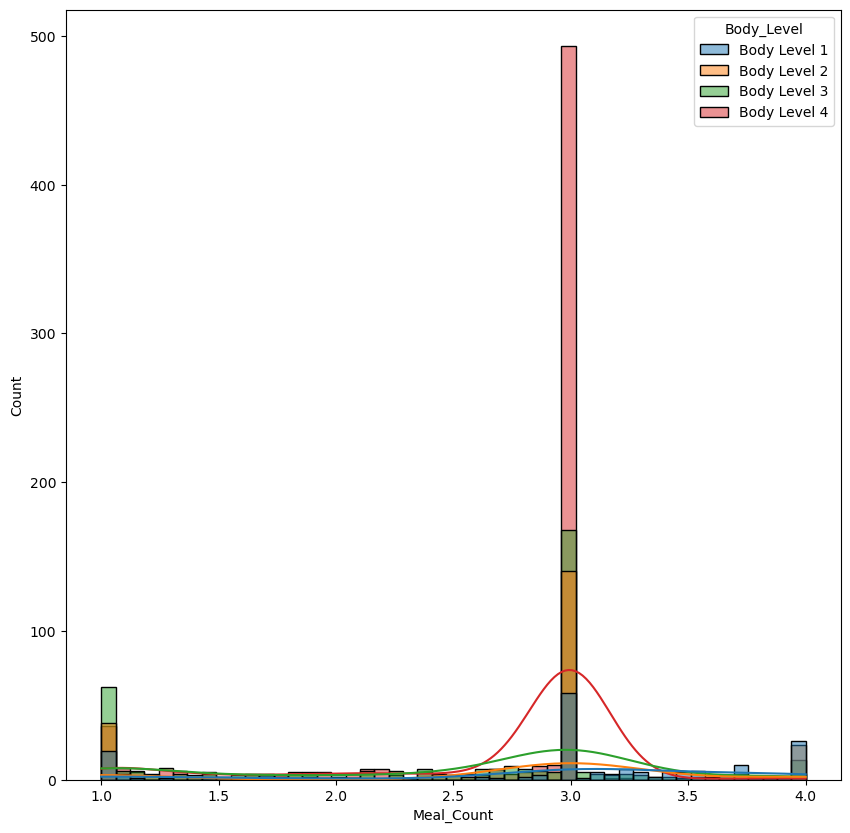

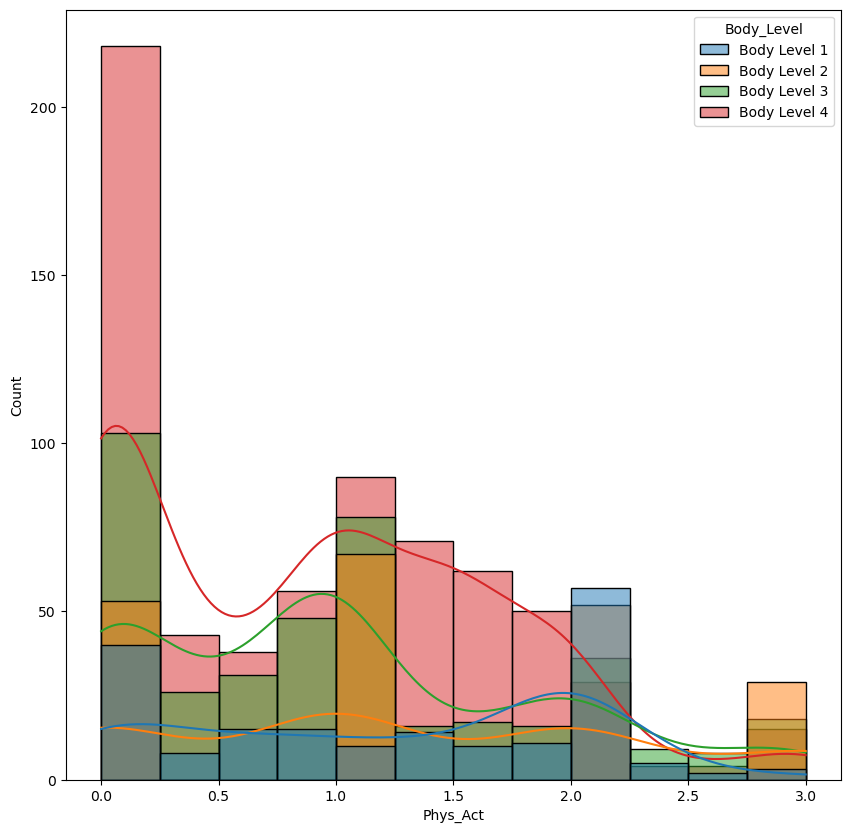

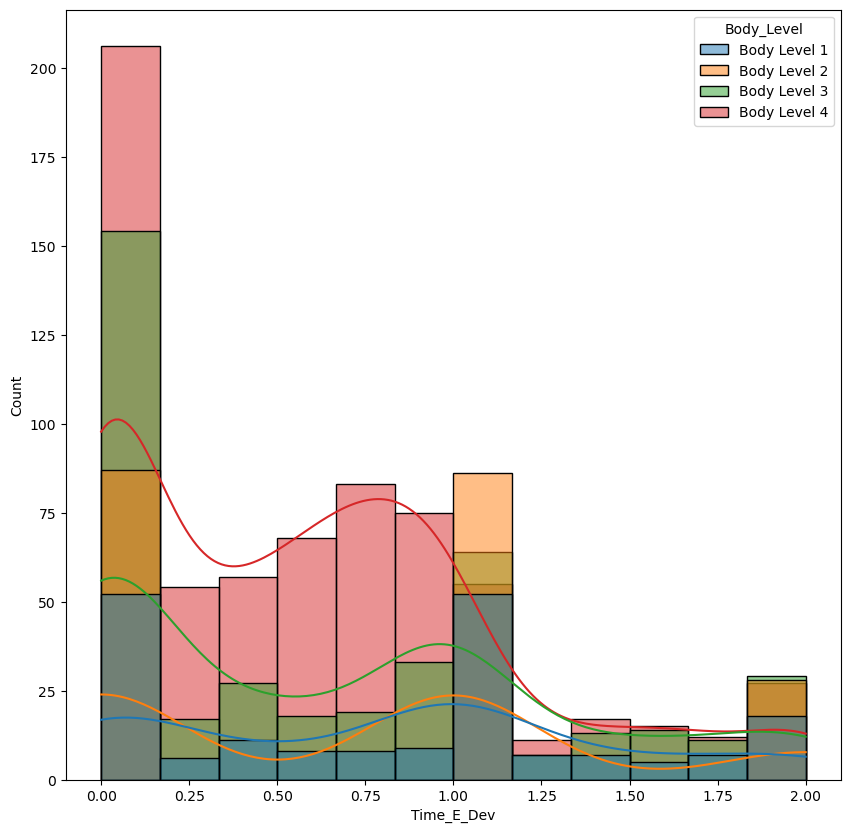

In [31]:
# plot histogram of numeric columns
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(10,10))
        sns.histplot(data = df, x = col, hue = 'Body_Level', kde=True)
        plt.show()

- ## statistical

In [47]:
print('zeroR algorithm to predict the most frequent class')
most_frequent_class = df['Body_Level'].value_counts().idxmax()
print('the most frequent class is: ', most_frequent_class)
print('accurecy for predict', most_frequent_class, 'is:', df[df['Body_Level'] == most_frequent_class].value_counts().sum()/df.shape[0])

zeroR algorithm to predict the most frequent class
the most frequent class is:  Body Level 4
accurecy for predict Body Level 4 is: 0.46039268788083954


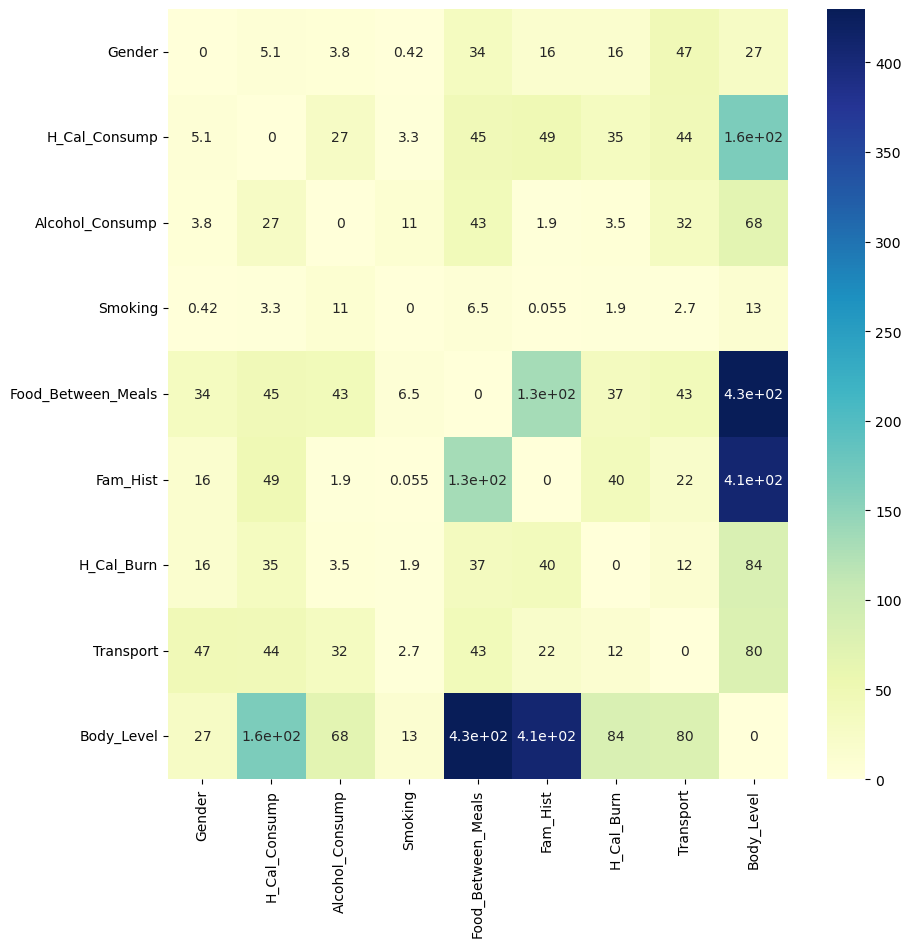

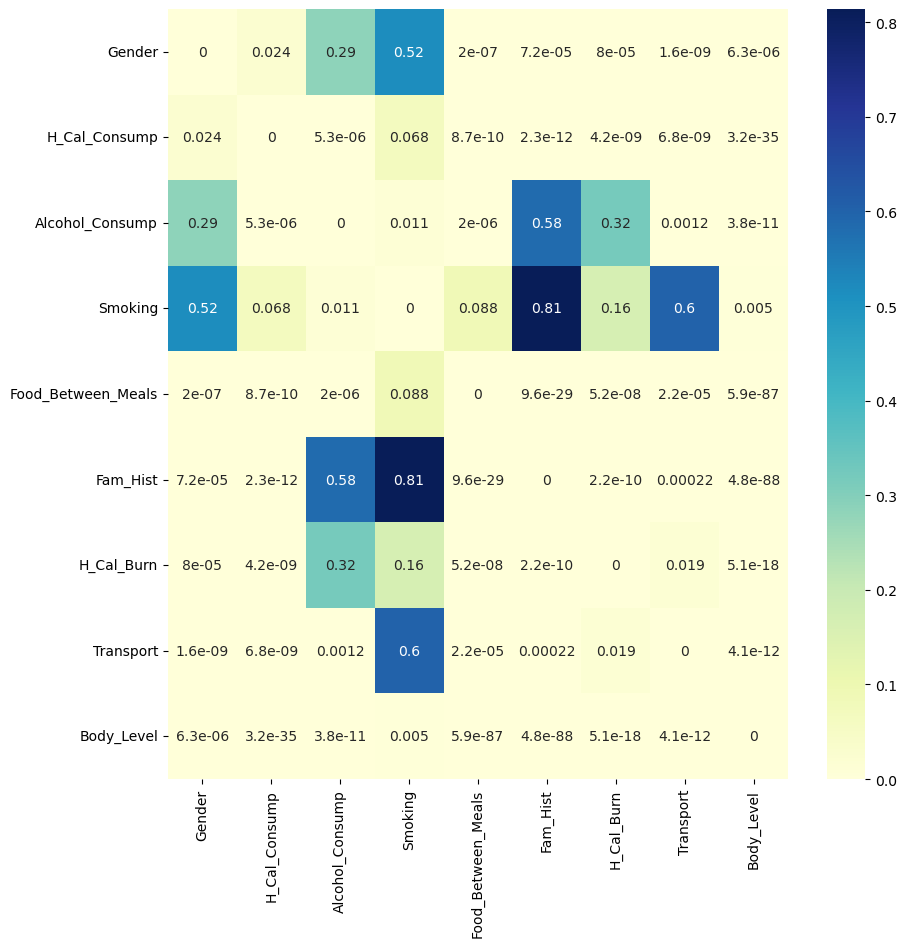

In [55]:
from scipy.stats import chi2_contingency
# get catigorical columns
categorical_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
chi2_test_prob = pd.DataFrame(columns=categorical_columns)
chi2_test_results = pd.DataFrame(columns=categorical_columns)
for column1 in categorical_columns:
    ps = []
    chi2s = []
    for column2 in categorical_columns:
        p = 0
        chi2 = 0
        if column1 != column2:
            table = pd.crosstab(df[column1], df[column2])
            chi2, p, dof, ex = chi2_contingency(table, lambda_='log-likelihood')
        ps.append(p)
        chi2s.append(chi2)
    chi2_test_prob = pd.concat([chi2_test_prob, pd.DataFrame([ps], columns=categorical_columns, index=[column1])])
    chi2_test_results = pd.concat([chi2_test_results, pd.DataFrame([chi2s], columns=categorical_columns, index=[column1])])

chi2_test_results = chi2_test_results.astype(float)
plt.figure(figsize=(10, 10))
sns.heatmap(chi2_test_results, annot=True, cmap="YlGnBu")
plt.show() 

chi2_test_prob = chi2_test_prob.astype(float)
plt.figure(figsize=(10, 10))
sns.heatmap(chi2_test_prob, annot=True, cmap="YlGnBu")
plt.show() 

Text(0.5, 1.0, 'Pearson Correlation')

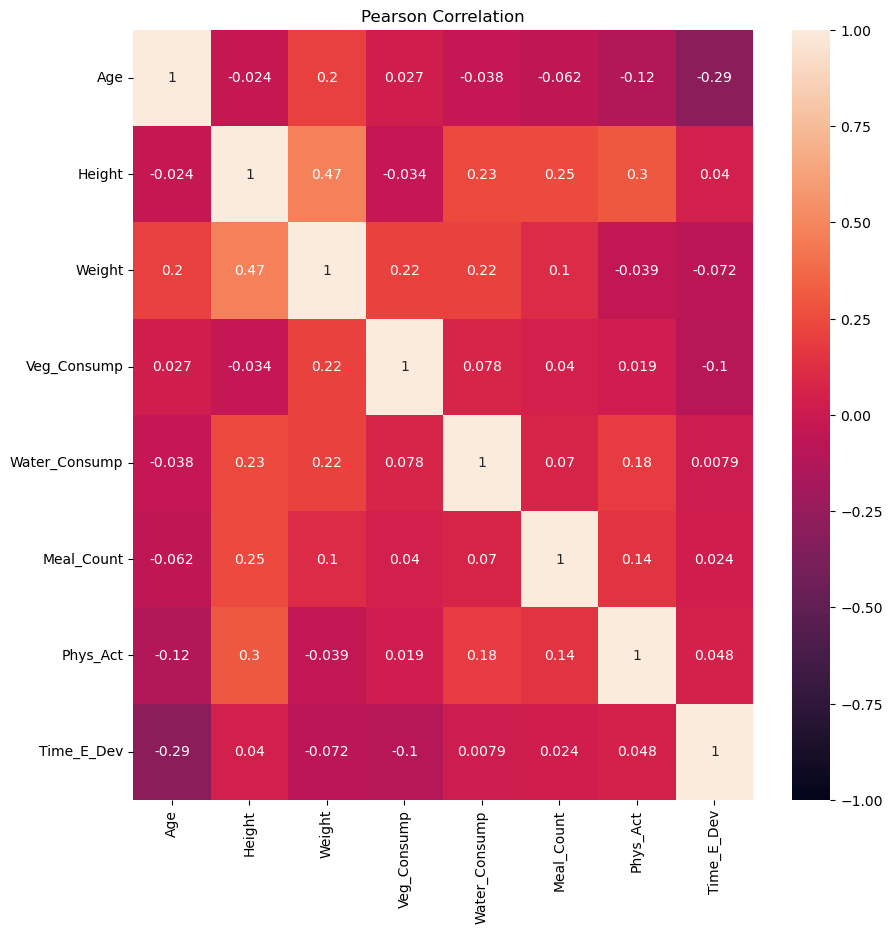

In [56]:
p = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(p, vmin=-1, 
                  vmax=1, annot=True)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

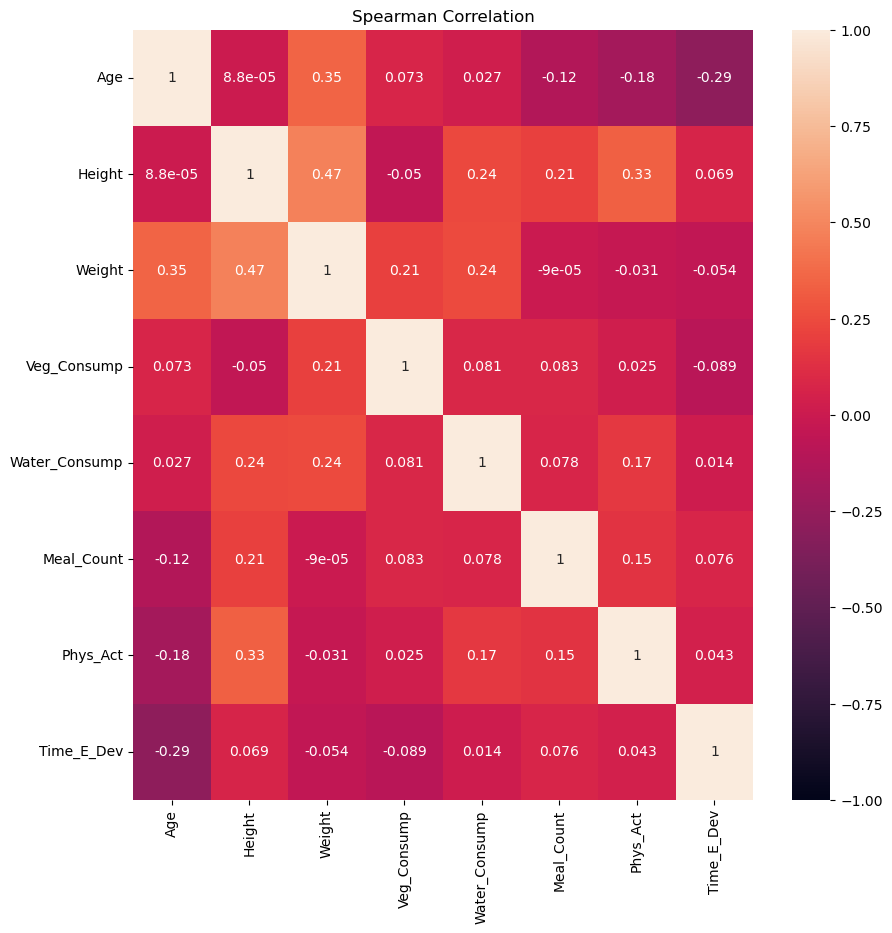

In [57]:
s = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(s, vmin=-1, 
                  vmax=1, annot=True)
plt.title("Spearman Correlation")

# Random Forest model

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_coded_values[df_coded_values.columns[:-1]], 
                                    df_coded_values[df_coded_values.columns[-1]], 
                                    test_size=0.30, stratify=df_coded_values[df_coded_values.columns[-1]])
print(X_train.shape)
print(X_test.shape)

(1033, 16)
(444, 16)


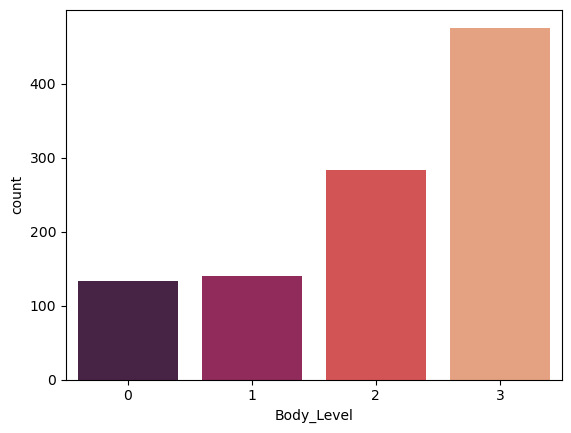

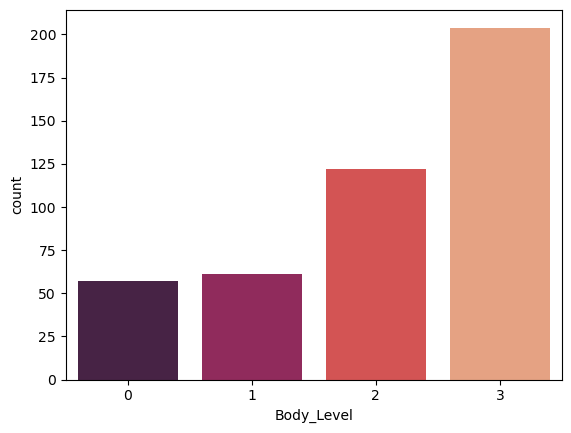

In [101]:
# plot count plot for train and test data to check if the data is stratified
plt.figure()
sns.countplot(x = y_train, palette='rocket')
plt.show()

plt.figure()
sns.countplot(x = y_test, palette='rocket')
plt.show()

### comment on splitting data
- we use 70% - 30% train and validation as recommended also we try 80% - 20% but it didn't give a good estimet 
- also we use stratify parameter to split data with orriginal distribustion that make model train better as it see the original distribution 

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = RandomForestClassifier(n_estimators=10, max_depth=12, random_state=0, criterion="gini", class_weight="balanced")
clf.fit(X_train, y_train)
# calculate classification report
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('accuracy score on train set: ', accuracy_score(y_train, y_train_pred))
print('accuracy score on validation set: ', accuracy_score(y_test, y_test_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('classification report: \n', classification_report(y_test, y_test_pred))


accuracy score on train set:  0.9970958373668926
accuracy score on validation set:  0.9324324324324325
confusion matrix: 
 [[ 56   1   0   0]
 [  2  48  11   0]
 [  0   7 111   4]
 [  0   0   5 199]]
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.86      0.79      0.82        61
           2       0.87      0.91      0.89       122
           3       0.98      0.98      0.98       204

    accuracy                           0.93       444
   macro avg       0.92      0.91      0.92       444
weighted avg       0.93      0.93      0.93       444



### comment on splitting data
- max_depth and n_estimators : I use trial and error to get the suitable value; to get these values, I compare between training error and validation error and stopped when the validation error decreases agian
- criterion : using gini error function was the best 
- class_weight

In [103]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=12, max_depth=12, random_state=0, criterion="gini", class_weight="balanced")
                        ,n_estimators=10, random_state=0).fit(X_train, y_train)

# calculate classification report
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('accuracy score on train set: ', accuracy_score(y_train, y_train_pred))
print('accuracy score on validation set: ', accuracy_score(y_test, y_test_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('classification report: \n', classification_report(y_test, y_test_pred))

accuracy score on train set:  0.9961277831558567
accuracy score on validation set:  0.9572072072072072
confusion matrix: 
 [[ 56   0   1   0]
 [  0  47  14   0]
 [  0   2 118   2]
 [  0   0   0 204]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.96      0.77      0.85        61
           2       0.89      0.97      0.93       122
           3       0.99      1.00      1.00       204

    accuracy                           0.96       444
   macro avg       0.96      0.93      0.94       444
weighted avg       0.96      0.96      0.96       444



In [83]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=12, max_depth=12, random_state=0, criterion="gini", class_weight="balanced")
                        ,n_estimators=10, random_state=0))
#
# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
#
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(pipeline, X=df_coded_values[df_coded_values.columns[:-1]], y=df_coded_values[df_coded_values.columns[-1]], cv=skf, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.94594595 0.9527027  0.94576271 0.94915254 0.95932203]
Cross Validation accuracy: 0.951 +/- 0.005


In [72]:
# Extract single tree
estimator = clf.estimators_[9]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_coded_values.columns[:-1],
                class_names = df_coded_values.columns[-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')